<table align="center">
  <td align="center"><a target="_blank" href="http://introtodeeplearning.com">
        <img src="https://i.ibb.co/Jr88sn2/mit.png" style="padding-bottom:5px;" />
      Visit MIT Deep Learning</a></td>
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/aamini/introtodeeplearning/blob/master/lab2/solutions/Part1_MNIST_Solution.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/aamini/introtodeeplearning/blob/master/lab2/solutions/Part1_MNIST_Solution.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

# Copyright Information

In [49]:
# Copyright 2022 MIT 6.S191 Introduction to Deep Learning. All Rights Reserved.
# 
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of 6.S191 must
# reference:
#
# © MIT 6.S191: Introduction to Deep Learning
# http://introtodeeplearning.com
#

Membuat dan melatih CNN untuk mengklasifikasikan tulisan tangan dari dataset  [MNIST](http://yann.lecun.com/exdb/mnist/). MNIST dataset terdiri dari 60,000 training images dan 10,000 test images. Kelas target adalah digit 0-9.

### 1. Load/Import Library yang diperlukan

In [50]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert len(tf.config.list_physical_devices('GPU')) > 0

### 2. Load data dari Keras

load  dataset dan menampilkan beberapa sample secara acak

In [51]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

training set berupa gambar angka tulisan tangan hitam putih berukuran 28x28.
Visualisasi dibawah merupakan gambar dari tulisan tangan dan labelnya.

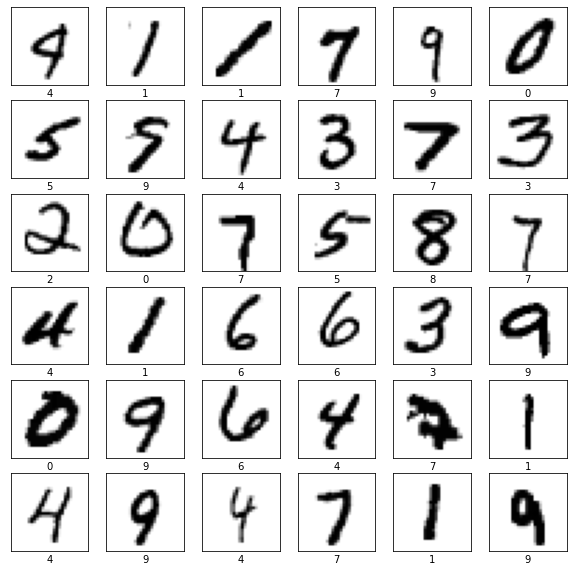

In [52]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

Arsitektur CNN paling baik dari hasil eksplorasi adalah CNN yang terdiri dari dua convolutional layers and pooling layers, diikuti dengan dua fully connected layers, terakhir output layer yang terdiri dari 10 hidden unit sesuai dengan jumlah kelas target (0-9). Berikut arsitektur CNN yang dibangun:

![alt_text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab2/img/convnet_fig.png "CNN Architecture for MNIST Classification")

### 3. Buat model CNN

In [53]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2),),

        # TODO: Define the third convolutional layer
        #tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),

        # TODO: Define the third max pooling layer
        #tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(1, 1)),

        # TODO: Define the fourth convolutional layer
        #tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),

        # TODO: Define the fourth max pooling layer
        #tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(1, 1)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return cnn_model
  
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 36)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 900)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

### 4. Compile model
Optimizer terbaik hasil eksplorasi adalah Adam Optimizer dengan learning rate 0,001


In [54]:
'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 5. Latih model

In [55]:
BATCH_SIZE = 64
EPOCHS = 5

In [56]:
'''TODO: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
history = cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1841 - accuracy: 0.9443 - val_loss: 0.0544 - val_accuracy: 0.9816
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0536 - accuracy: 0.9834 - val_loss: 0.0507 - val_accuracy: 0.9836
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.0358 - val_accuracy: 0.9873
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0312 - val_accuracy: 0.9895
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0216 - accuracy: 0.9926 - val_loss: 0.0262 - val_accuracy: 0.9908


In [57]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

Great! Now that we've trained the model, let's evaluate it on the test dataset using the [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#evaluate) method:

In [58]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0262 - accuracy: 0.9908
Test accuracy: 0.9908000230789185


In [59]:
test_loss

0.02615944854915142

In [60]:
epoch_count = range(1, len(training_loss) + 1)

### 6. Visualisasikan hasil training dan validasi

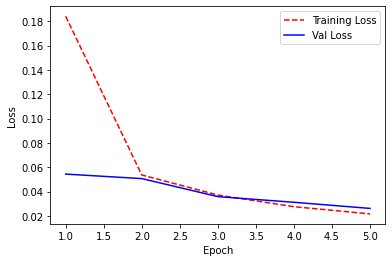

In [61]:
# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

### 7. Melakukan prediksi menggunakan model CNN yang sudah dilatih
Hasil prediksi adalah probabilitas untuk setiap kelas target. Kelas dengan probabilitas yang paling tinggi yang diambil sebagai hasil akhir.


In [62]:
predictions = cnn_model.predict(test_images)

In [63]:
predictions[0]

array([1.2021356e-10, 2.8080325e-11, 8.5633147e-08, 7.3251073e-08,
       4.2463255e-12, 7.2980143e-11, 1.0682536e-14, 9.9999988e-01,
       2.1402037e-10, 1.2864076e-08], dtype=float32)

In [64]:
'''TODO: identify the digit with the highest confidence prediction for the first
    image in the test dataset. '''
prediction = np.argmax(predictions[0]) 

print(prediction)

7


Label of this digit is: 7


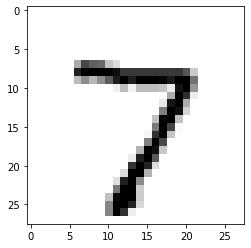

In [65]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)

### 8. Visualisasi hasil prediksi
Memvisualisasikan image dari dataset test dan label hasil prediksi seta histogram yang menunjukkan probabilitas yang diprediksi untuk setiap kelas target.

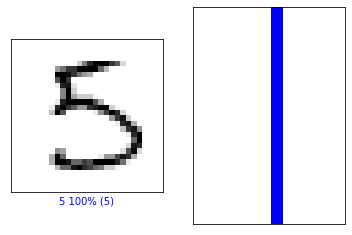

In [66]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 15 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

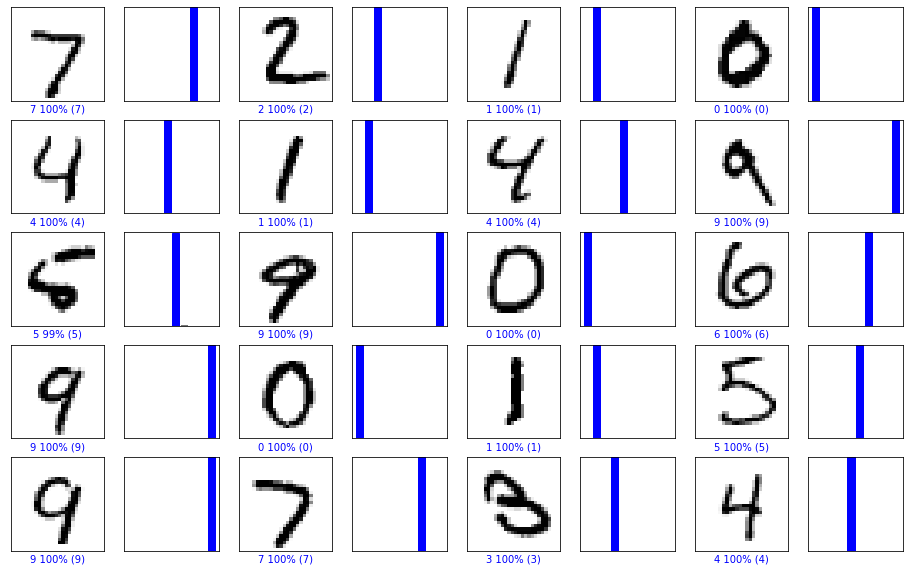

In [67]:
# Plots the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  mdl.lab2.plot_value_prediction(i, predictions, test_labels)


## Extra
Sebagai alternatif dari fungsi fit untuk melatih model, kita bisa menggunakan fungsi GradientTape untuk melatih model.

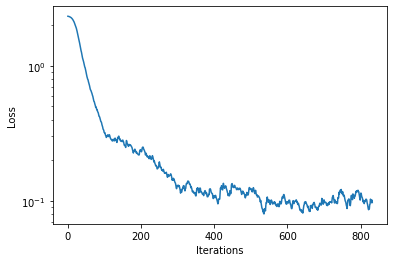

100%|██████████| 938/938 [00:10<00:00, 93.08it/s]


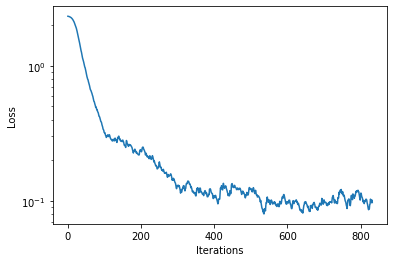

In [68]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = BATCH_SIZE
loss_history = mdl.util.LossHistory(smoothing_factor=0.95) # to record the evolution of the loss
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss', scale='semilogy')
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3) # define our optimizer

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for idx in tqdm(range(0, train_images.shape[0], batch_size)):
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    #'''TODO: feed the images into the model and obtain the predictions'''
    logits = cnn_model(images)
    # logits = # TODO

    #'''TODO: compute the categorical cross entropy loss
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
    # loss_value = tf.keras.backend.sparse_categorical_crossentropy() # TODO

  loss_history.append(loss_value.numpy().mean()) # append the loss to the loss_history record
  plotter.plot(loss_history.get())

  # Backpropagation
  '''TODO: Use the tape to compute the gradient against all parameters in the CNN model.
      Use cnn_model.trainable_variables to access these parameters.''' 
  grads = tape.gradient(loss_value, cnn_model.trainable_variables)
  # grads = # TODO
  optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))
